<a href="https://colab.research.google.com/github/rrohanj/MLREPO/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df=pd.read_csv('/content/drive/MyDrive/dataset/titan.csv')
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])
print("\nMissing values per column:")
print(df.isnull().sum())

Number of rows: 891
Number of columns: 12

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
irrelevant_col=["PassengerId","Name","Ticket","Cabin"]
df.drop(columns=irrelevant_col,inplace=True)
print("\nMissing Values after handling:")
print(df.isnull().sum())


Missing Values after handling:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
Q1=df["Fare"].quantile(0.25)
Q3=df["Fare"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df["Fare"]=np.where(df["Fare"]>lower_bound,lower_bound,df["Fare"])
df["Fare"]=np.where(df["Fare"]<upper_bound,upper_bound,df["Fare"])
df=pd.get_dummies(df,columns=["Sex","Embarked"],drop_first=True)
label_encoder=LabelEncoder()
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col]=label_encoder.fit_transform(df[col])
X=df.drop("Survived",axis=1)
y=df["Survived"]
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.50,random_state=42,stratify=y_temp)
print("Training Set:",X_train.shape,y_train.shape)
print("Validation Set:",X_val.shape,y_val.shape)
print("Testing Set:",X_test.shape,y_test.shape)


Training Set: (623, 8) (623,)
Validation Set: (134, 8) (134,)
Testing Set: (134, 8) (134,)


--- 1. KNN Imputation ---
    Age
0  22.0
1  38.0
2  26.0
3  35.0
4  35.0

--- 2. Outlier Capping ---
Max Fare before: 512.3292, Max Fare after capping: 112.07915

--- 3. Standard Scaling ---
Scaled Data (First row):
 [-0.58110351 -0.50244517  0.82737724  0.43279337]

--- 4. File Saved as titanic_processed.csv ---


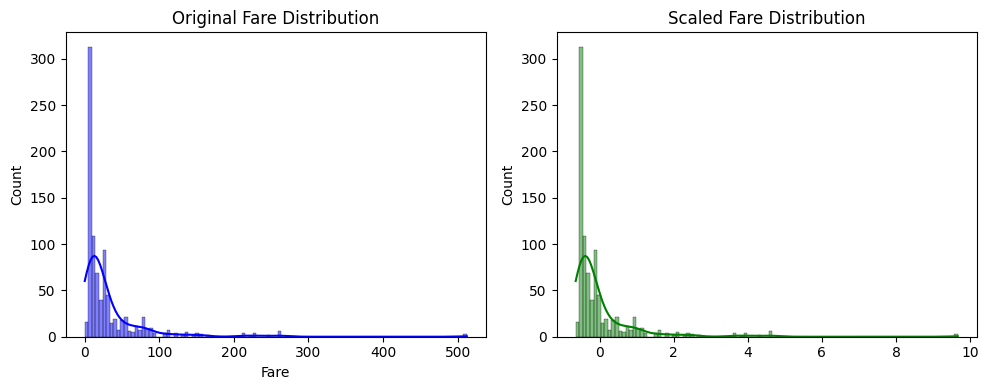

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data again to ensure fresh start
df = pd.read_csv('/content/drive/MyDrive/dataset/titan.csv')

# 1. KNN Imputation for 'Age'
print("--- 1. KNN Imputation ---")
imputer = KNNImputer(n_neighbors=3)
# KNN works on numeric data, so we select only numeric columns for this demo
df_numeric = df[['Age', 'Fare', 'Pclass', 'SibSp']]
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_imputed[['Age']].head())

# 2. Outlier Treatment (Capping vs Removal)
print("\n--- 2. Outlier Capping ---")
upper_limit = df['Fare'].quantile(0.95) # Cap at 95th percentile
df['Fare_Capped'] = np.where(df['Fare'] > upper_limit, upper_limit, df['Fare'])
print(f"Max Fare before: {df['Fare'].max()}, Max Fare after capping: {df['Fare_Capped'].max()}")

# 3. Feature Scaling
print("\n--- 3. Standard Scaling ---")
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)
print("Scaled Data (First row):\n", df_scaled[0])

# 4. Save Processed Data
pd.DataFrame(df_scaled).to_csv('titanic_processed.csv', index=False)
print("\n--- 4. File Saved as titanic_processed.csv ---")

# 5. Visualization: Original vs Scaled Distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], kde=True, color='blue')
plt.title("Original Fare Distribution")

plt.subplot(1, 2, 2)
# We plot the 2nd column of df_scaled which corresponds to Fare
sns.histplot(df_scaled[:, 1], kde=True, color='green')
plt.title("Scaled Fare Distribution")
plt.tight_layout()
plt.show()